### Importy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import optuna
import tensorflow as tf
import tensorflow as tf
import numpy as np
from scripts.train_utilities import *
from scripts.essentials import *
from scripts.plots import *
import random

In [3]:
#tf.compat.v1.disable_v2_behavior()

In [4]:
train_set = pd.read_csv('train_set_full.csv')
test_set = pd.read_csv('test_set_full.csv')
val_set = pd.read_csv('val_set_full.csv')

In [5]:
prefix = "NFLX"

### Optuna

In [24]:
random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)

In [26]:
window_size = 10
target_cols = ['target_5']
cols_used = [
             'norm_rsi_gspc_14', 'norm_rsi_14',
             'norm_slowk_14', 'minmax_high_norm', 'log_return_1'
             ]

X,y = window_dataset(train_set[list(cols_used)+target_cols],  target_cols[0], window_size)
X_val, y_val = window_dataset(val_set[list(cols_used)+target_cols], target_cols[0], window_size)
X_test, y_test = window_dataset(test_set[list(cols_used)+target_cols], target_cols[0], window_size)

study_f = optuna.create_study(direction='maximize')
study_f.optimize(objective, n_trials=15)  # Adjust n_trials to how many trials you want to run

print(study_f.best_params)


[I 2023-12-29 12:00:14,924] A new study created in memory with name: no-name-d932c231-8f37-4b55-adfa-1fb05d80deb7
[I 2023-12-29 12:00:27,614] Trial 0 finished with value: 0.45933014154434204 and parameters: {'use_conv': False, 'n_layers': 1, 'lstm_units_0': 16, 'dense_units': 16, 'learning_rate': 1.9227528681200608e-05}. Best is trial 0 with value: 0.45933014154434204.
[I 2023-12-29 12:00:40,444] Trial 1 finished with value: 0.8564593195915222 and parameters: {'use_conv': True, 'conv_filters': 32, 'conv_kernel_size': 3, 'n_layers': 1, 'lstm_units_0': 64, 'dense_units': 8, 'learning_rate': 1.4878924790227031e-05}. Best is trial 1 with value: 0.8564593195915222.
[I 2023-12-29 12:00:50,069] Trial 2 finished with value: 0.619617223739624 and parameters: {'use_conv': True, 'conv_filters': 128, 'conv_kernel_size': 3, 'n_layers': 1, 'lstm_units_0': 32, 'dense_units': 16, 'learning_rate': 0.0075480232289603455}. Best is trial 1 with value: 0.8564593195915222.
[I 2023-12-29 12:01:16,434] Trial 

{'use_conv': True, 'conv_filters': 128, 'conv_kernel_size': 2, 'n_layers': 3, 'lstm_units_0': 64, 'lstm_units_1': 64, 'lstm_units_2': 16, 'dense_units': 8, 'learning_rate': 1.5701617470255185e-05}


In [65]:
window_size = 10
target_cols = ['target_5']
cols_used = [
             'finbert_Score', 'bart_Score', 'vader_Score',
             'mean_influential', 'mean_trustworthy'
             ]

X,y = window_dataset(train_set[list(cols_used)+target_cols],  target_cols[0], window_size)
X_val, y_val = window_dataset(val_set[list(cols_used)+target_cols], target_cols[0], window_size)
X_test, y_test = window_dataset(test_set[list(cols_used)+target_cols], target_cols[0], window_size)

study_n = optuna.create_study(direction='maximize')
study_n.optimize(objective, n_trials=15)  # Adjust n_trials to how many trials you want to run

print(study_n.best_params)

[I 2023-12-29 13:17:28,443] A new study created in memory with name: no-name-934ee022-79f4-45dc-80ae-1fe3011843e2
[I 2023-12-29 13:17:51,785] Trial 0 finished with value: 0.744019091129303 and parameters: {'use_conv': True, 'conv_filters': 64, 'conv_kernel_size': 3, 'n_layers': 1, 'lstm_units_0': 32, 'dense_units': 8, 'learning_rate': 0.0002758139276809543}. Best is trial 0 with value: 0.744019091129303.
[I 2023-12-29 13:18:04,700] Trial 1 finished with value: 0.5741627216339111 and parameters: {'use_conv': True, 'conv_filters': 32, 'conv_kernel_size': 3, 'n_layers': 2, 'lstm_units_0': 32, 'lstm_units_1': 64, 'dense_units': 8, 'learning_rate': 0.00014012287973040003}. Best is trial 0 with value: 0.744019091129303.
[I 2023-12-29 13:18:30,220] Trial 2 finished with value: 0.5 and parameters: {'use_conv': True, 'conv_filters': 32, 'conv_kernel_size': 3, 'n_layers': 2, 'lstm_units_0': 32, 'lstm_units_1': 64, 'dense_units': 16, 'learning_rate': 0.0007433401028973926}. Best is trial 0 with v

{'use_conv': True, 'conv_filters': 64, 'conv_kernel_size': 4, 'n_layers': 1, 'lstm_units_0': 32, 'dense_units': 8, 'learning_rate': 0.00016310678940475854}


In [137]:
window_size = 10
target_cols = ['target_5']
cols_used = [
            'norm_rsi_gspc_14', 'norm_rsi_14',
             'norm_slowk_14', 'minmax_high_norm', 'log_return_1',
             'finbert_Score', 'bart_Score', 'vader_Score',
             'mean_influential', 'mean_trustworthy'
             ]

X,y = window_dataset(train_set[list(cols_used)+target_cols],  target_cols[0], window_size)
X_val, y_val = window_dataset(val_set[list(cols_used)+target_cols], target_cols[0], window_size)
X_test, y_test = window_dataset(test_set[list(cols_used)+target_cols], target_cols[0], window_size)

study_full = optuna.create_study(direction='maximize')
study_full.optimize(objective, n_trials=15)  # Adjust n_trials to how many trials you want to run

print(study_full.best_params)

[I 2023-12-29 14:08:46,900] A new study created in memory with name: no-name-2b189b3b-01cd-4e9b-9098-1a25f9b54b96
[I 2023-12-29 14:09:18,071] Trial 0 finished with value: 0.7631579041481018 and parameters: {'use_conv': False, 'n_layers': 3, 'lstm_units_0': 32, 'lstm_units_1': 64, 'lstm_units_2': 16, 'dense_units': 32, 'learning_rate': 0.00021065761528338845}. Best is trial 0 with value: 0.7631579041481018.
[I 2023-12-29 14:09:52,628] Trial 1 finished with value: 0.6387559771537781 and parameters: {'use_conv': True, 'conv_filters': 32, 'conv_kernel_size': 2, 'n_layers': 3, 'lstm_units_0': 64, 'lstm_units_1': 32, 'lstm_units_2': 64, 'dense_units': 8, 'learning_rate': 2.9179152022312246e-05}. Best is trial 0 with value: 0.7631579041481018.
[I 2023-12-29 14:10:26,905] Trial 2 finished with value: 0.7464114427566528 and parameters: {'use_conv': True, 'conv_filters': 32, 'conv_kernel_size': 5, 'n_layers': 2, 'lstm_units_0': 64, 'lstm_units_1': 32, 'dense_units': 16, 'learning_rate': 0.000118

{'use_conv': False, 'n_layers': 3, 'lstm_units_0': 16, 'lstm_units_1': 64, 'lstm_units_2': 16, 'dense_units': 32, 'learning_rate': 0.0008883537767775628}


### Model Finance

In [106]:
window_size = 10
target_cols = ['target_5']
cols_used = [
             'norm_rsi_gspc_14', 'norm_rsi_14',
             'norm_slowk_14', 'minmax_high_norm', 'log_return_1'
             ]
shift_ = 5

X, y, X_val, y_val, X_test, y_test, y_base_train, y_base_val, y_base_test,\
y_base0_train, y_base0_val, y_base0_test = get_x_y(train_set = train_set,
        val_set = val_set, test_set = test_set, cols_used = cols_used,
        target_cols= target_cols, window_size=10, shift_= shift_)

In [81]:
model = train_model_from_params(study_f.best_params, X, y, X_val, y_val)

Epoch 1/350
21/21 [==============================] - 10s 107ms/step - loss: 0.0059 - custom_auc: 0.5000 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 2/350
21/21 [==============================] - 0s 20ms/step - loss: 0.0059 - custom_auc: 0.5000 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 3/350
21/21 [==============================] - 0s 20ms/step - loss: 0.0059 - custom_auc: 0.5000 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 4/350
21/21 [==============================] - 0s 20ms/step - loss: 0.0059 - custom_auc: 0.5000 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 5/350
21/21 [==============================] - 0s 21ms/step - loss: 0.0059 - custom_auc: 0.4950 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 6/350
21/21 [==============================] - 0s 13ms/step - loss: 0.0059 - custom_auc: 0.5034 - val_loss: 0.0011 - val_custom_auc: 0.5000
Epoch 7/350
21/21 [==============================] - 0s 13ms/step - loss: 0.0059 - custom_auc: 0.5280 - val_loss: 0.0011 -

In [82]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [108]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y>0, y_pred_train.flatten()>0))
print(roc_auc_score(y_val>0, y_pred_val.flatten()>0))
print(roc_auc_score(y_test>0, y_pred_test[:-shift_].flatten()>0))

0.5757658617083538
0.8421052631578947
0.712962962962963


In [109]:
print(f'train')
print(count_signs_matrix(y, y_pred_train.flatten()))
print(f'val')
print(count_signs_matrix(y_val, y_pred_val.flatten()))
print(f'test')
print(count_signs_matrix(y_test, y_pred_test[:-shift_].flatten()))

train
[[176 157]
 [118 195]]
val
[[13  6]
 [ 0 11]]
test
[[19  8]
 [ 5 13]]


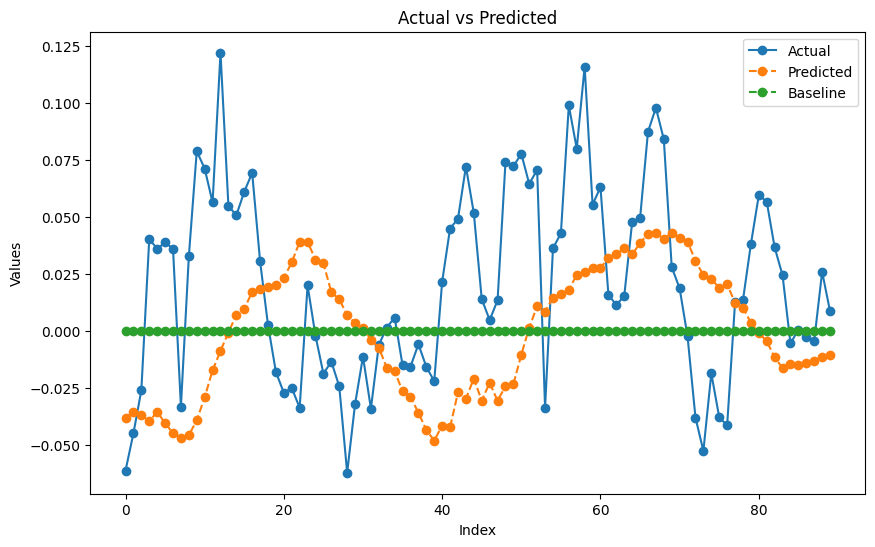

In [91]:
k=-90
m = 5
plot_actual_vs_predicted(y[k:], y_pred_train[k:]*m, y_base0_train[k:])

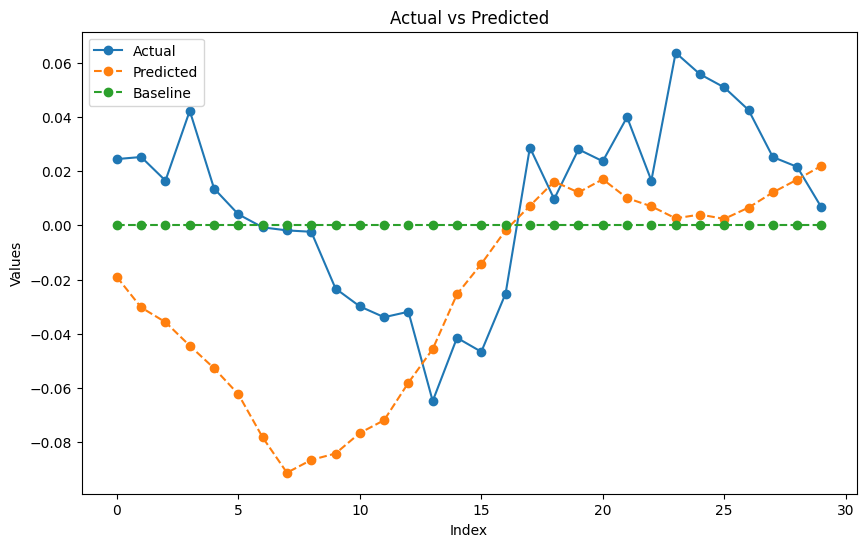

In [92]:
plot_actual_vs_predicted(y_val, y_pred_val*m, y_base0_val)

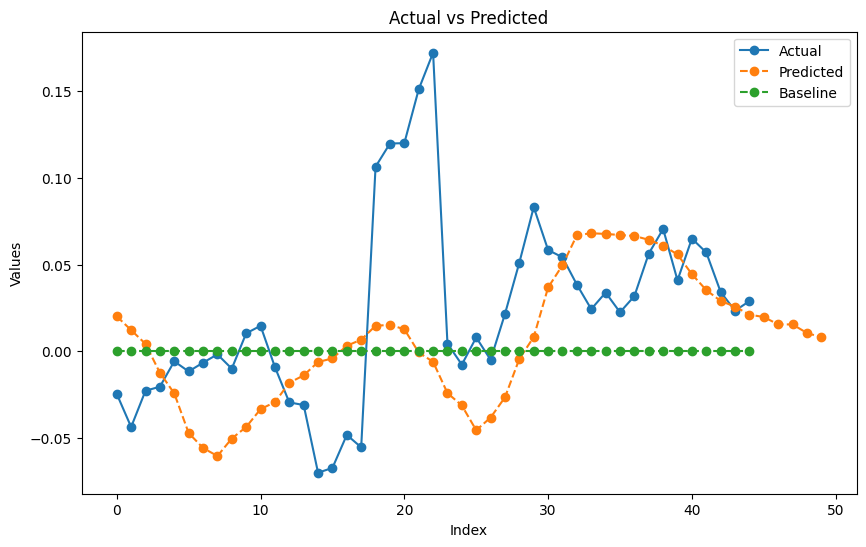

In [110]:
plot_actual_vs_predicted(y_test, y_pred_test*m, y_base0_test)

In [116]:
print('Model')
print(calculate_metrics(y, y_pred_train, y_test, y_pred_test[:-shift_], y_val, y_pred_val))
print('-----')
print('Baseline 0')
print(calculate_metrics(y, y_base0_train, y_test, y_base0_test, y_val, y_base0_val))
print('-----')
print('Baseline Prev')
print(calculate_metrics(y, y_base_train, y_test, y_base_test, y_val, y_base_val))


Model
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.048056  0.005699  0.075492  0.034783  155.324906  1.596708
Test        0.040319  0.003162  0.056236 -0.087178  111.000664  1.339614
Validation  0.027605  0.001005  0.031695  0.021213  155.851493  0.917200
-----
Baseline 0
                 MAE       MSE      RMSE  R2 Score   MAPE      MASE
Train       0.048982  0.005906  0.076853 -0.000329  100.0  1.627464
Test        0.043854  0.003434  0.058597 -0.180420  100.0  1.457100
Validation  0.028025  0.001089  0.032995 -0.060713  100.0  0.931150
-----
Baseline Prev
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.074259  0.011990  0.109500 -1.030736  634.540522  2.467319
Test        0.063536  0.007392  0.085975 -1.541105  348.201485  2.111043
Validation  0.045731  0.003208  0.056637 -2.125460  418.216884  1.519465


In [115]:
#save model to h5
model.save(prefix+'_lstm_fin_cols.h5')

### Model News

In [117]:
window_size = 10
target_cols = ['target_5']
cols_used = [
             'finbert_Score', 'bart_Score', 'vader_Score',
             'mean_influential', 'mean_trustworthy'
             ]
shift_ = 5

X, y, X_val, y_val, X_test, y_test, y_base_train, y_base_val, y_base_test,\
y_base0_train, y_base0_val, y_base0_test = get_x_y(train_set = train_set,
        val_set = val_set, test_set = test_set, cols_used = cols_used,
        target_cols= target_cols, window_size=10, shift_= shift_)

In [128]:
model = train_model_from_params(study_n.best_params, X, y, X_val, y_val)

Epoch 1/350
21/21 [==============================] - 5s 55ms/step - loss: 0.0062 - custom_auc: 0.5256 - val_loss: 0.0014 - val_custom_auc: 0.3134
Epoch 2/350
21/21 [==============================] - 0s 8ms/step - loss: 0.0060 - custom_auc: 0.5211 - val_loss: 0.0015 - val_custom_auc: 0.5335
Epoch 3/350
21/21 [==============================] - 0s 8ms/step - loss: 0.0059 - custom_auc: 0.5320 - val_loss: 0.0014 - val_custom_auc: 0.5598
Epoch 4/350
21/21 [==============================] - 0s 8ms/step - loss: 0.0058 - custom_auc: 0.5236 - val_loss: 0.0012 - val_custom_auc: 0.4833
Epoch 5/350
21/21 [==============================] - 0s 6ms/step - loss: 0.0058 - custom_auc: 0.5191 - val_loss: 0.0015 - val_custom_auc: 0.5526
Epoch 6/350
21/21 [==============================] - 0s 8ms/step - loss: 0.0058 - custom_auc: 0.5497 - val_loss: 0.0011 - val_custom_auc: 0.5096
Epoch 7/350
21/21 [==============================] - 0s 7ms/step - loss: 0.0058 - custom_auc: 0.5565 - val_loss: 0.0014 - val_cus

In [129]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [130]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y>0, y_pred_train.flatten()>0))
print(roc_auc_score(y_val>0, y_pred_val.flatten()>0))
print(roc_auc_score(y_test>0, y_pred_test[:-shift_].flatten()>0))

0.6233293996872271
0.9473684210526316
0.4907407407407407


In [131]:
print(f'train')
print(count_signs_matrix(y, y_pred_train.flatten()))
print(f'val')
print(count_signs_matrix(y_val, y_pred_val.flatten()))
print(f'test')
print(count_signs_matrix(y_test, y_pred_test[:-shift_].flatten()))

train
[[263  70]
 [170 143]]
val
[[17  2]
 [ 0 11]]
test
[[19  8]
 [13  5]]


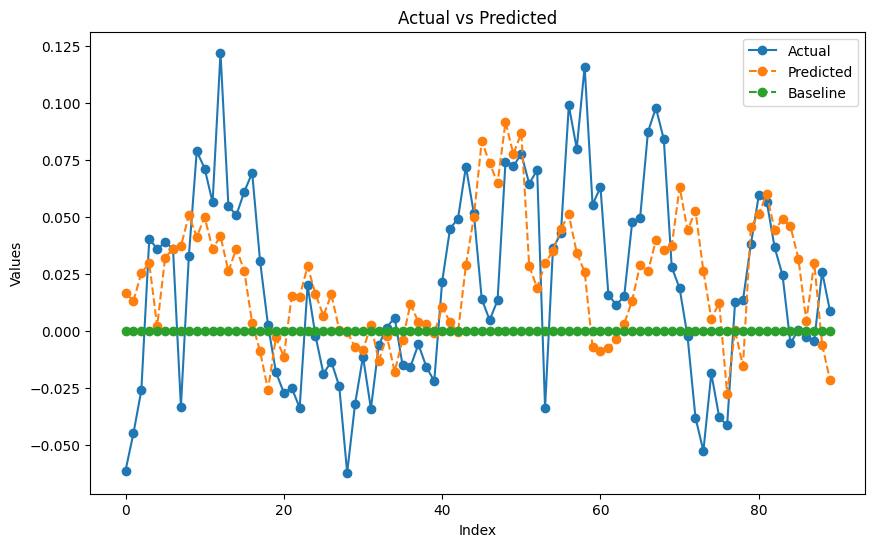

In [132]:
k=-90
m = 1
plot_actual_vs_predicted(y[k:], y_pred_train[k:]*m, y_base0_train[k:])

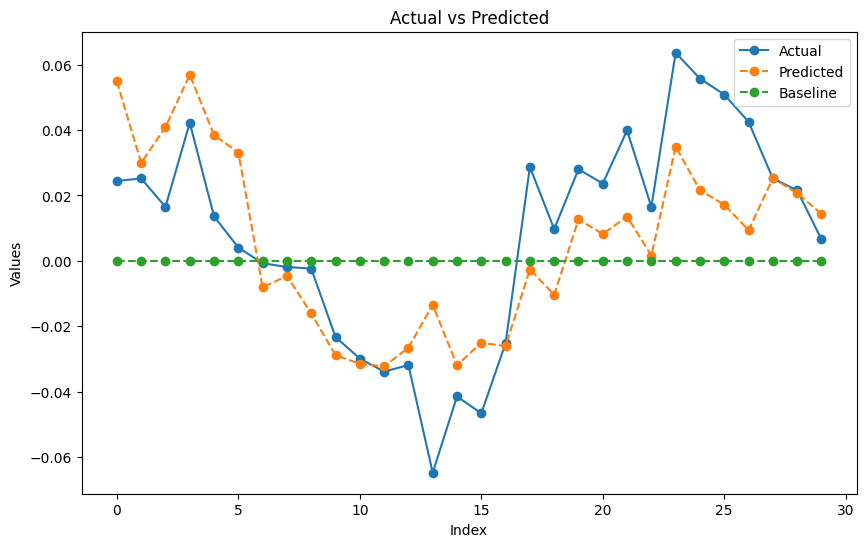

In [133]:
plot_actual_vs_predicted(y_val, y_pred_val*m, y_base0_val)

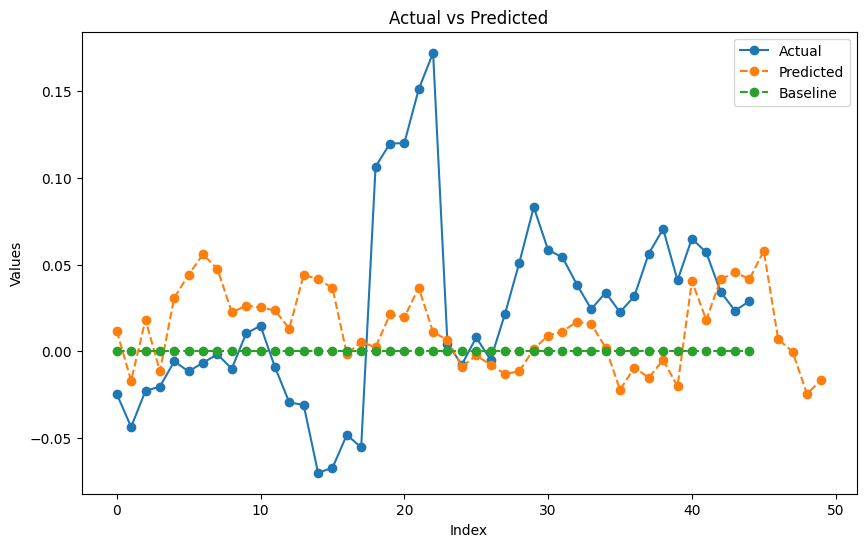

In [134]:
plot_actual_vs_predicted(y_test, y_pred_test*m, y_base0_test)

In [135]:
print('Model')
print(calculate_metrics(y, y_pred_train, y_test, y_pred_test[:-shift_], y_val, y_pred_val))
print('-----')
print('Baseline 0')
print(calculate_metrics(y, y_base0_train, y_test, y_base0_test, y_val, y_base0_val))
print('-----')
print('Baseline Prev')
print(calculate_metrics(y, y_base_train, y_test, y_base_test, y_val, y_base_val))


Model
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.044083  0.004767  0.069043  0.192646  347.479945  1.464695
Test        0.048413  0.003607  0.060059 -0.240023  171.169639  1.608560
Validation  0.017043  0.000460  0.021444  0.551956  307.872627  0.566266
-----
Baseline 0
                 MAE       MSE      RMSE  R2 Score   MAPE      MASE
Train       0.048982  0.005906  0.076853 -0.000329  100.0  1.627464
Test        0.043854  0.003434  0.058597 -0.180420  100.0  1.457100
Validation  0.028025  0.001089  0.032995 -0.060713  100.0  0.931150
-----
Baseline Prev
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.074259  0.011990  0.109500 -1.030736  634.540522  2.467319
Test        0.063536  0.007392  0.085975 -1.541105  348.201485  2.111043
Validation  0.045731  0.003208  0.056637 -2.125460  418.216884  1.519465


In [136]:
#save model to h5
model.save(prefix+'_lstm_news_cols.h5')

### Model Full

In [138]:
window_size = 10
target_cols = ['target_5']
cols_used = [
            'norm_rsi_gspc_14', 'norm_rsi_14',
             'norm_slowk_14', 'minmax_high_norm', 'log_return_1',
             'finbert_Score', 'bart_Score', 'vader_Score',
             'mean_influential', 'mean_trustworthy'
             ]
shift_ = 5

X, y, X_val, y_val, X_test, y_test, y_base_train, y_base_val, y_base_test,\
y_base0_train, y_base0_val, y_base0_test = get_x_y(train_set = train_set,
        val_set = val_set, test_set = test_set, cols_used = cols_used,
        target_cols= target_cols, window_size=10, shift_= shift_)

In [139]:
model = train_model_from_params(study_full.best_params, X, y, X_val, y_val)

Epoch 1/350
21/21 [==============================] - 9s 80ms/step - loss: 0.0059 - custom_auc: 0.5014 - val_loss: 0.0010 - val_custom_auc: 0.7129
Epoch 2/350
21/21 [==============================] - 0s 15ms/step - loss: 0.0059 - custom_auc: 0.5065 - val_loss: 0.0014 - val_custom_auc: 0.5000
Epoch 3/350
21/21 [==============================] - 0s 14ms/step - loss: 0.0059 - custom_auc: 0.5099 - val_loss: 0.0011 - val_custom_auc: 0.4880
Epoch 4/350
21/21 [==============================] - 0s 16ms/step - loss: 0.0057 - custom_auc: 0.5388 - val_loss: 0.0017 - val_custom_auc: 0.5000
Epoch 5/350
21/21 [==============================] - 0s 15ms/step - loss: 0.0058 - custom_auc: 0.5452 - val_loss: 0.0012 - val_custom_auc: 0.5072
Epoch 6/350
21/21 [==============================] - 0s 15ms/step - loss: 0.0057 - custom_auc: 0.5820 - val_loss: 0.0010 - val_custom_auc: 0.5646
Epoch 7/350
21/21 [==============================] - 0s 15ms/step - loss: 0.0057 - custom_auc: 0.5474 - val_loss: 0.0010 - v

In [140]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [141]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y>0, y_pred_train.flatten()>0))
print(roc_auc_score(y_val>0, y_pred_val.flatten()>0))
print(roc_auc_score(y_test>0, y_pred_test[:-shift_].flatten()>0))

0.5258853102303581
0.7129186602870813
0.6759259259259259


In [142]:
print(f'train')
print(count_signs_matrix(y, y_pred_train.flatten()))
print(f'val')
print(count_signs_matrix(y_val, y_pred_val.flatten()))
print(f'test')
print(count_signs_matrix(y_test, y_pred_test[:-shift_].flatten()))

train
[[263  70]
 [231  82]]
val
[[15  4]
 [ 4  7]]
test
[[17 10]
 [ 5 13]]


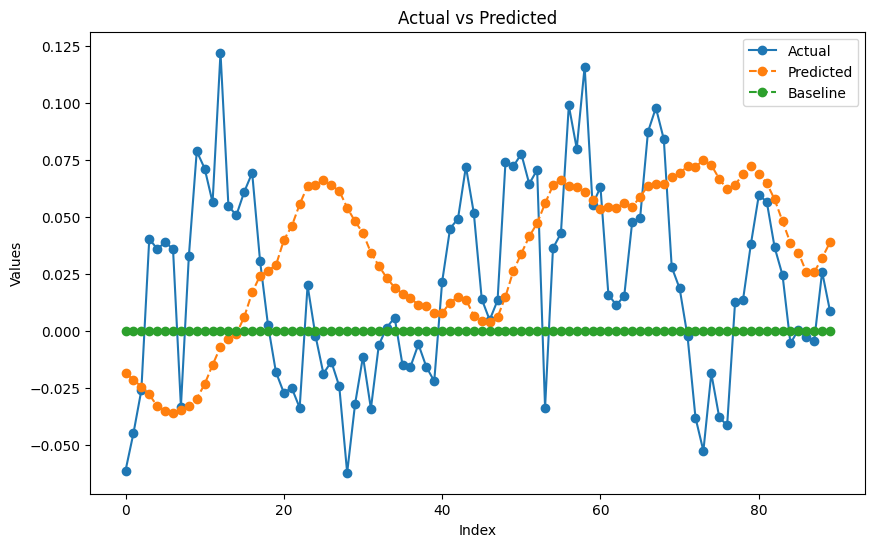

In [152]:
k=-90
m = 4
plot_actual_vs_predicted(y[k:], y_pred_train[k:]*m, y_base0_train[k:])

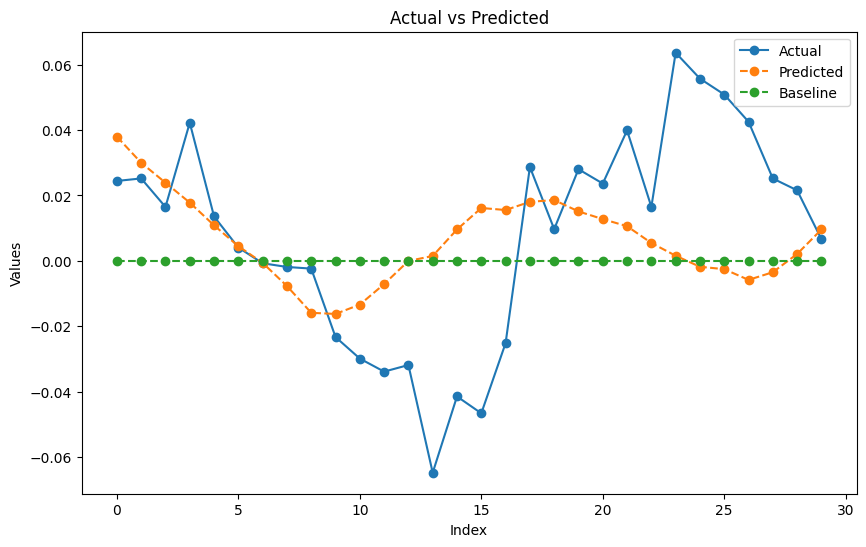

In [153]:
plot_actual_vs_predicted(y_val, y_pred_val*m, y_base0_val)

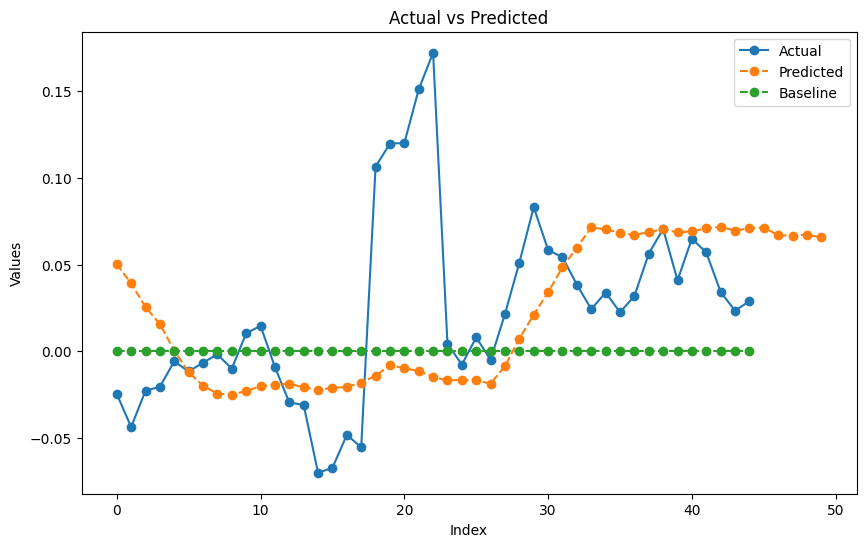

In [154]:
plot_actual_vs_predicted(y_test, y_pred_test*m, y_base0_test)

In [155]:
print('Model')
print(calculate_metrics(y, y_pred_train, y_test, y_pred_test[:-shift_], y_val, y_pred_val))
print('-----')
print('Baseline 0')
print(calculate_metrics(y, y_base0_train, y_test, y_base0_test, y_val, y_base0_val))
print('-----')
print('Baseline Prev')
print(calculate_metrics(y, y_base_train, y_test, y_base_test, y_val, y_base_val))


Model
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.048891  0.005855  0.076516  0.008411  179.518351  1.624430
Test        0.038539  0.003125  0.055905 -0.074426  117.209177  1.280494
Validation  0.026274  0.001035  0.032164 -0.008013  113.260492  0.872962
-----
Baseline 0
                 MAE       MSE      RMSE  R2 Score   MAPE      MASE
Train       0.048982  0.005906  0.076853 -0.000329  100.0  1.627464
Test        0.043854  0.003434  0.058597 -0.180420  100.0  1.457100
Validation  0.028025  0.001089  0.032995 -0.060713  100.0  0.931150
-----
Baseline Prev
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.074259  0.011990  0.109500 -1.030736  634.540522  2.467319
Test        0.063536  0.007392  0.085975 -1.541105  348.201485  2.111043
Validation  0.045731  0.003208  0.056637 -2.125460  418.216884  1.519465


In [156]:
#save model to h5
model.save(prefix+'_lstm_full_cols.h5')